In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import biom
import qiime2

import warnings

In [2]:
warnings.filterwarnings("ignore")
sns.set(style="darkgrid")

In [3]:
%cd /storage/zkarwowska/zkarwowska/microbiome-interactions/datasets/processed/

/storage/zkarwowska/zkarwowska/microbiome-interactions/datasets/processed


In [104]:
q2202_s1_taxonomy = pd.read_csv('taxonomy/q2202_s1_taxonomy.csv', index_col = [0])
q2202_s2_taxonomy = pd.read_csv('taxonomy/q2202_s2_taxonomy.csv', index_col = [0])
q550_m_taxonomy = pd.read_csv('taxonomy/q550_m_taxonomy.csv', index_col = [0])
q550_f_taxonomy = pd.read_csv('taxonomy/q550_f_taxonomy.csv', index_col = [0])

## plot mean taxonomic levels

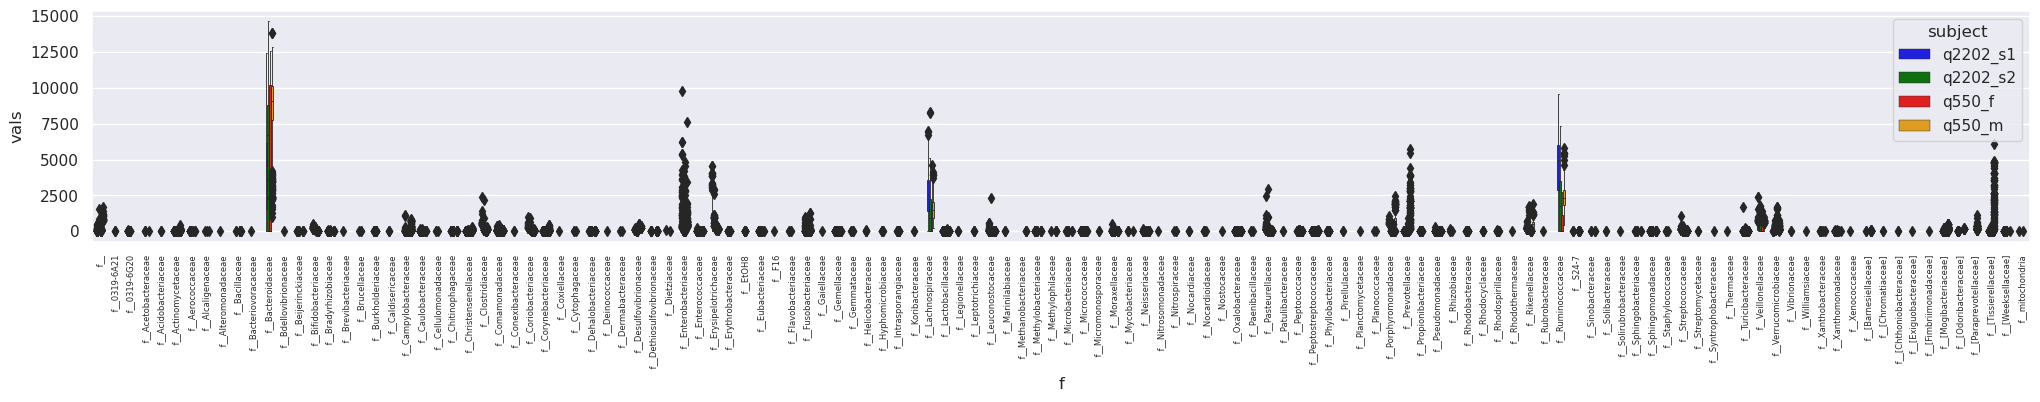

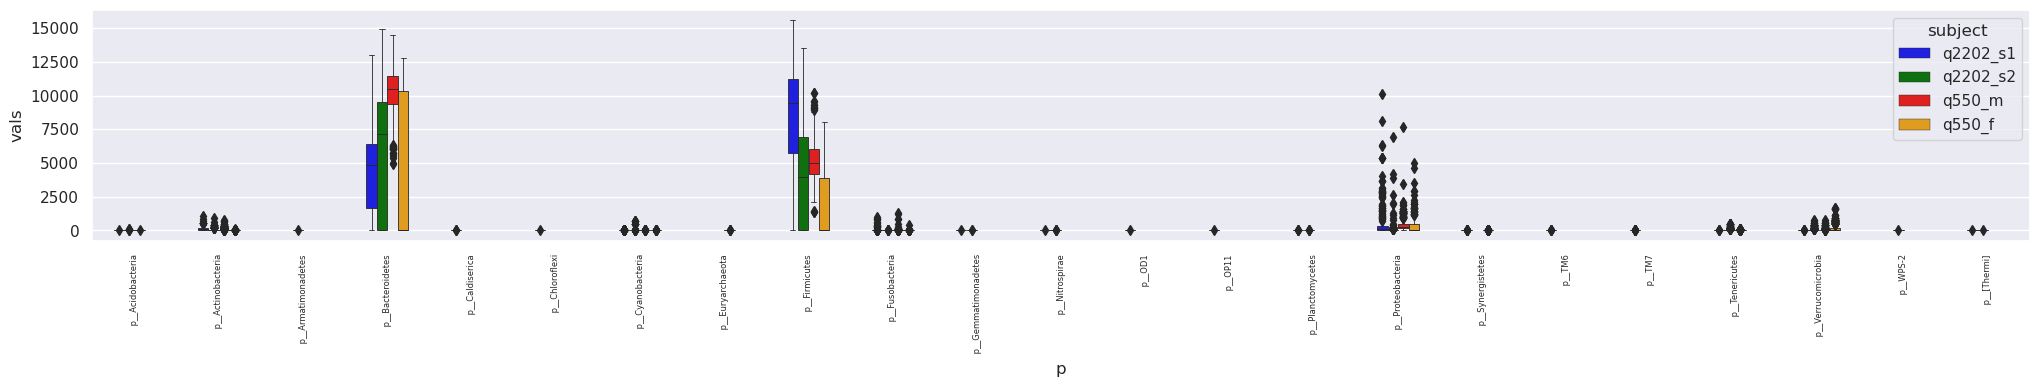

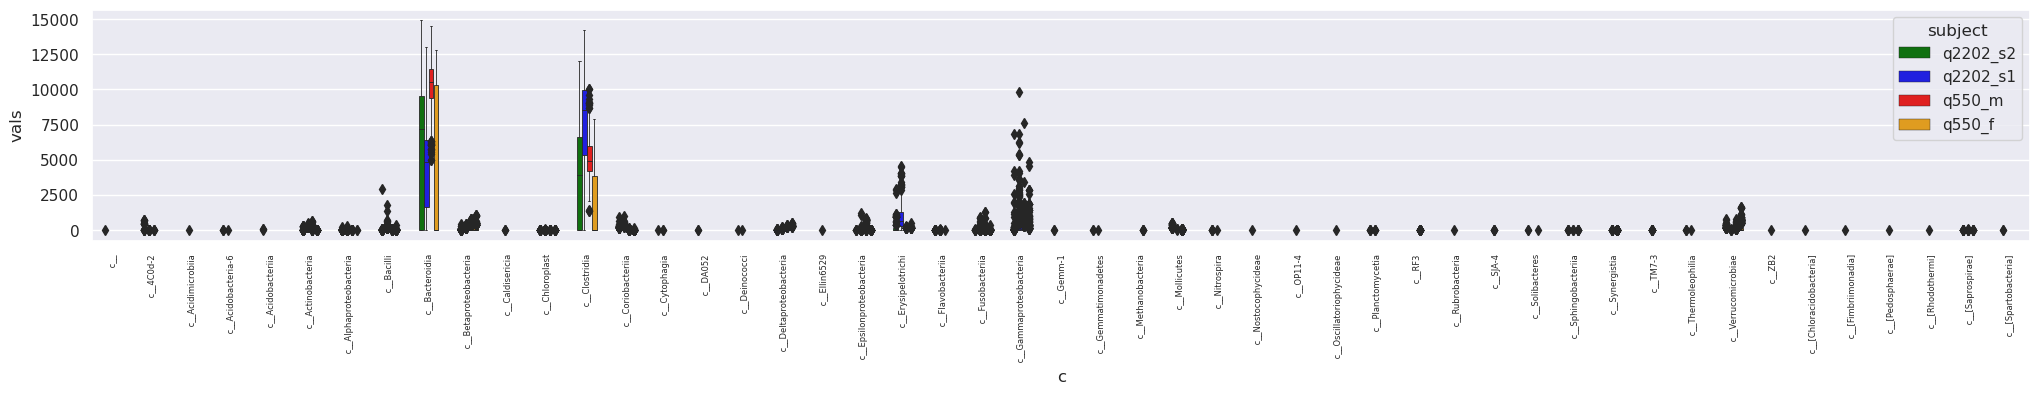

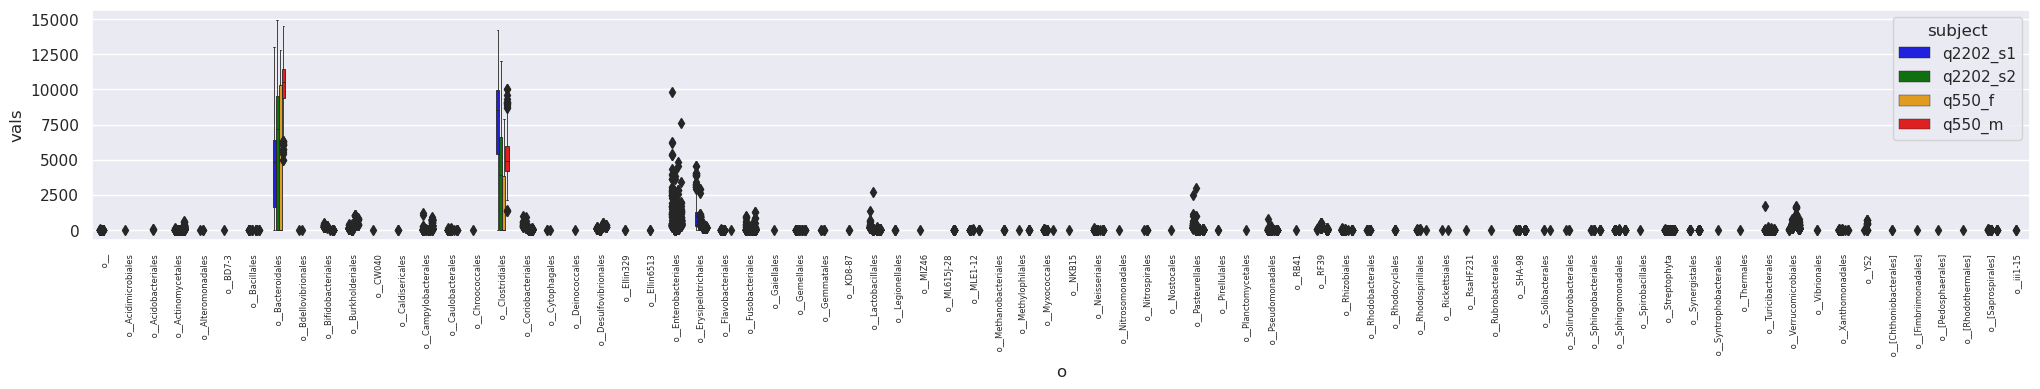

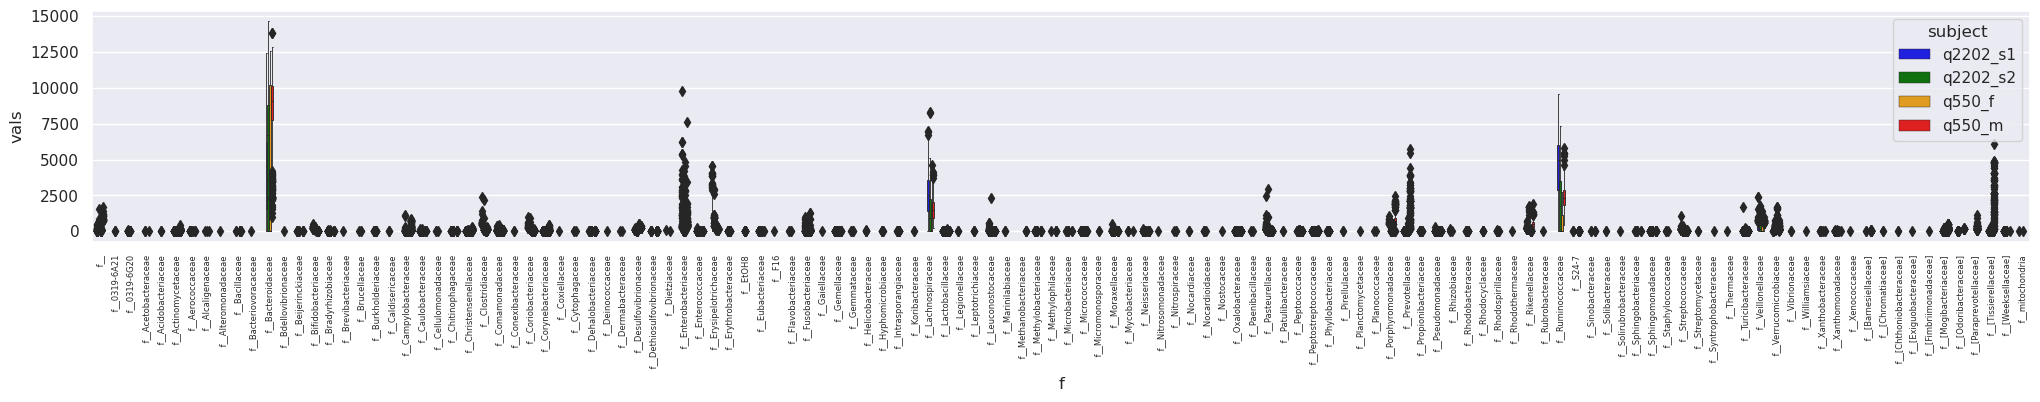

In [133]:
q2202_s1_taxonomy['subject'] = 'q2202_s1'
q2202_s2_taxonomy['subject'] = 'q2202_s2'
q550_m_taxonomy['subject'] = 'q550_m'
q550_f_taxonomy['subject'] = 'q550_f'

phylum_df = q2202_s1_taxonomy.append(q2202_s2_taxonomy).append(q550_m_taxonomy).append(q550_f_taxonomy)

tax_levels = ['p', 'c', 'o', 'f']


for level in tax_levels:
    
    grouped_tax_df = phylum_df.groupby([level, 'subject']).sum().reset_index()
    grouped_tax_df_melted = grouped_tax_df.melt([level, 'subject'], var_name='cols', value_name='vals')
    
    cmap_dict = {'q2202_s1':'blue',
                 'q2202_s2' : 'green', 
                 'q550_m': 'red',
                 'q550_f': 'orange'}
    
    
    plt.figure(figsize = [25, 3])
    ax = sns.boxplot(x=level,
                     y="vals",
                     hue = 'subject',
                     data=grouped_tax_df_melted,
                     linewidth = .6,
                     width = .5,
                     palette = cmap_dict
                    )

    plt.xticks(rotation = 90, fontsize = 6)
    plt.savefig('{}.png'.format(level))
    plt.show()

## plot phylum fluctuations through time

In [138]:
def plot_bacteria_fluctuation(df, level, subject):
    
    
    grouped_tax_df = df.groupby(level).sum()
    grouped_tax_df = grouped_tax_df.iloc[:, 100:200]

    '''my_colors = list(islice(cycle(['darkblue', 'lightblue', 'blue', 
                                   'red', 'pink', 'orange', 
                                   'darkgreen', 'green',
                                   'y', 'gold', 'brown',
                                   'k', 'grey', 'silver']), None, len(grouped_tax_df)))'''

    grouped_tax_df.reset_index().set_index(level).T.plot(kind='bar',
                                                       stacked=True,
                                                       figsize = [10, 3])#,legend=False)
    plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
    plt.title(subject)
    plt.xticks(fontsize=5, rotation=90)
    plt.savefig('phylum_fluctuations_{}.png'.format(subject))
    plt.show()

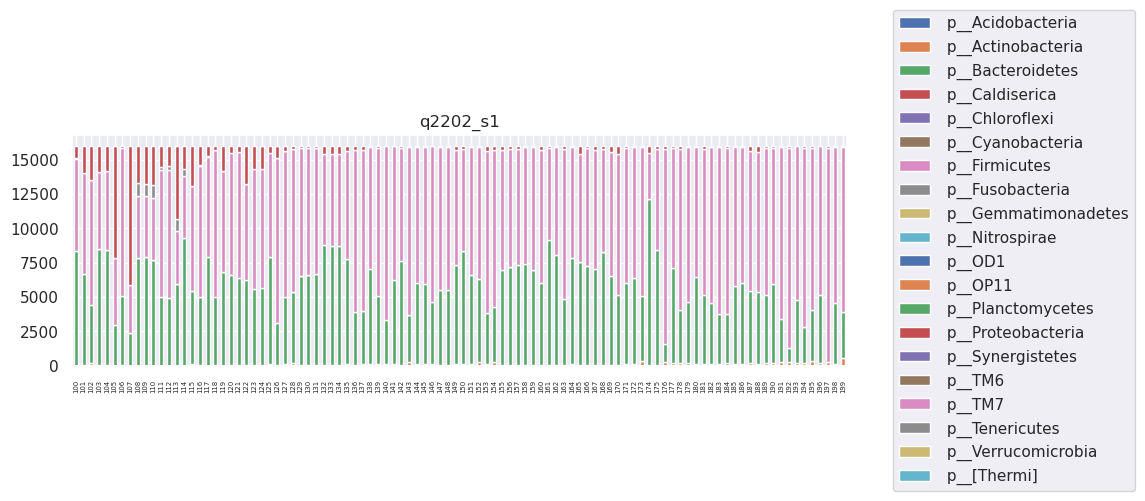

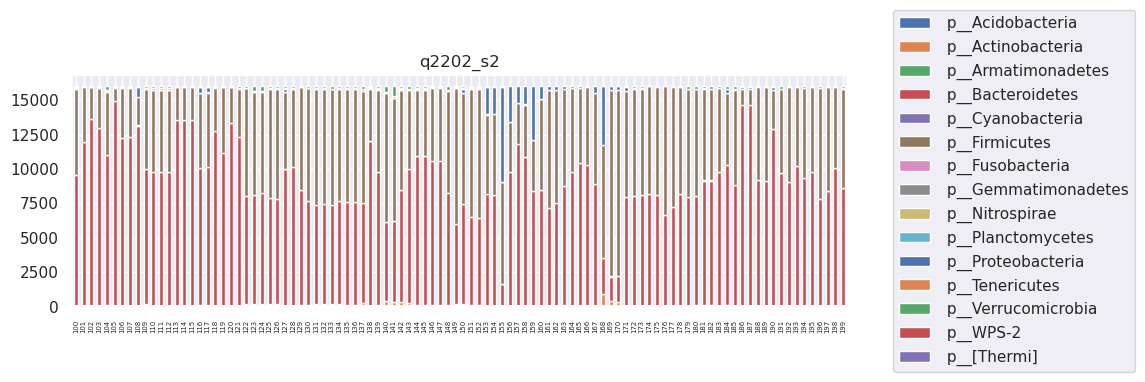

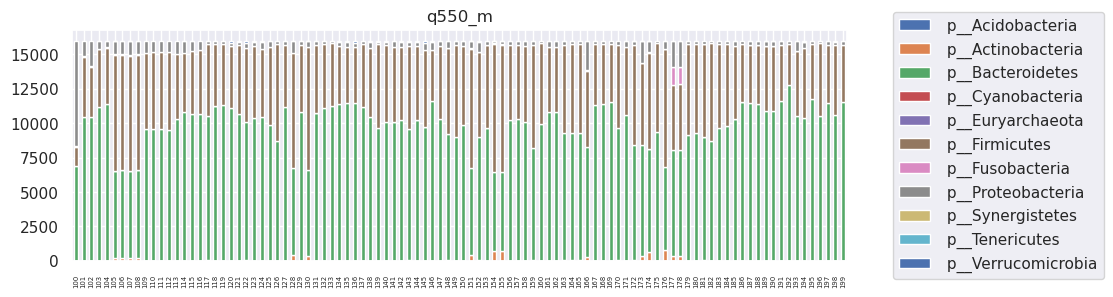

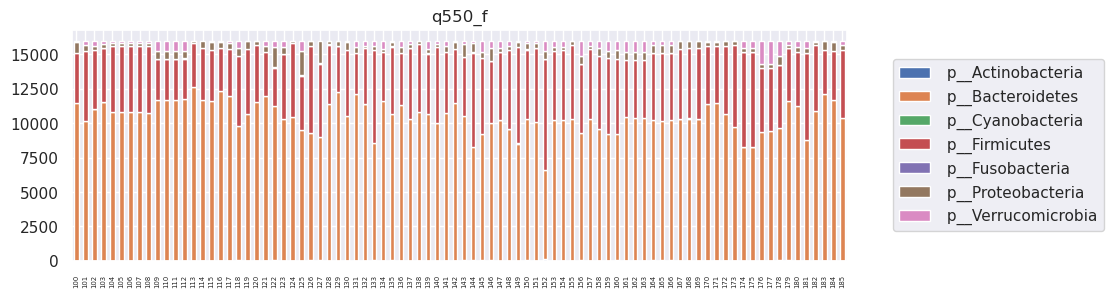

In [139]:
plot_bacteria_fluctuation(q2202_s1_taxonomy, 'p', 'q2202_s1')
plot_bacteria_fluctuation(q2202_s2_taxonomy, 'p', 'q2202_s2')
plot_bacteria_fluctuation(q550_m_taxonomy, 'p', 'q550_m')
plot_bacteria_fluctuation(q550_f_taxonomy, 'p', 'q550_f')